<a href="https://colab.research.google.com/github/techbrothers3/Diabetes-prediction-kaggle/blob/main/Diabetes_Prediction_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix


In [59]:
class ClassificationModel:
    def __init__(self, data_url, target_column):
        self.data_url = data_url
        self.target_column = target_column
        self.data = None
        self.models = {
            'KNN': KNeighborsClassifier(),
            'SVM': SVC(),
            'Logistic Regression': LogisticRegression(),
            'Naive Bayes': GaussianNB()
        }
        self.scaler = StandardScaler()

    def load_data(self):
        self.data = pd.read_csv(self.data_url)

    def outlier_detection(self):
      fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
      axes = axes.flatten()

      for i, column in enumerate(self.data.columns):
        sns.boxplot(x=column, data = self.data, ax=axes[i])
        axes[i].set_title(column)
      plt.tight_layout()
      plt.show()

    def plot_correlation_matrix(self):
      corr_matrix = self.data.corr()
      plt.figure(figsize=(10,8))
      sns.heatmap(corr_matrix, annot=True, cmap=plt.cm.CMRmap_r)
      plt.show()


    def handle_outliers(self, cols):
      for col in cols:
        Q1 = self.data[col].quantile(0.25)
        Q3 = self.data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

            # Removing the outliers
        self.data.drop(self.data[(self.data[col] < lower) | (self.data[col] > upper)].index, inplace=True)

        # Boxplot after removing outliers
        plt.figure()
        self.data.boxplot([col])
        plt.title(col)

    def preprocess_data(self):
        X = self.data.drop([self.target_column], axis=1)
        y = self.data[self.target_column]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        X_train = self.scaler.fit_transform(X_train)
        X_test = self.scaler.transform(X_test)

        return X_train, X_test, y_train, y_test

    def train_models(self, X_train, y_train):
        for model_name, model in self.models.items():
            model.fit(X_train, y_train)
            print(f"{model_name} trained successfully.")

    def evaluate_models(self, X_test, y_test):
        for model_name, model in self.models.items():
            y_pred = model.predict(X_test)

            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(6,6))
            sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
            plt.title(f'Confusion Matrix - {model_name}')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')
            plt.show()

            accuracy = accuracy_score(y_test, y_pred)
            report = classification_report(y_test, y_pred)
            print(f"\n{model_name} Evaluation:")
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Classification Report:\n{report}")

In [60]:
if __name__ == "__main__":

  diabetes_model = ClassificationModel("diabetes.csv", "Outcome")


  diabetes_model.load_data()
  diabetes_model.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:
diabetes_model.data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
diabetes_model.data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


IndexError: ignored

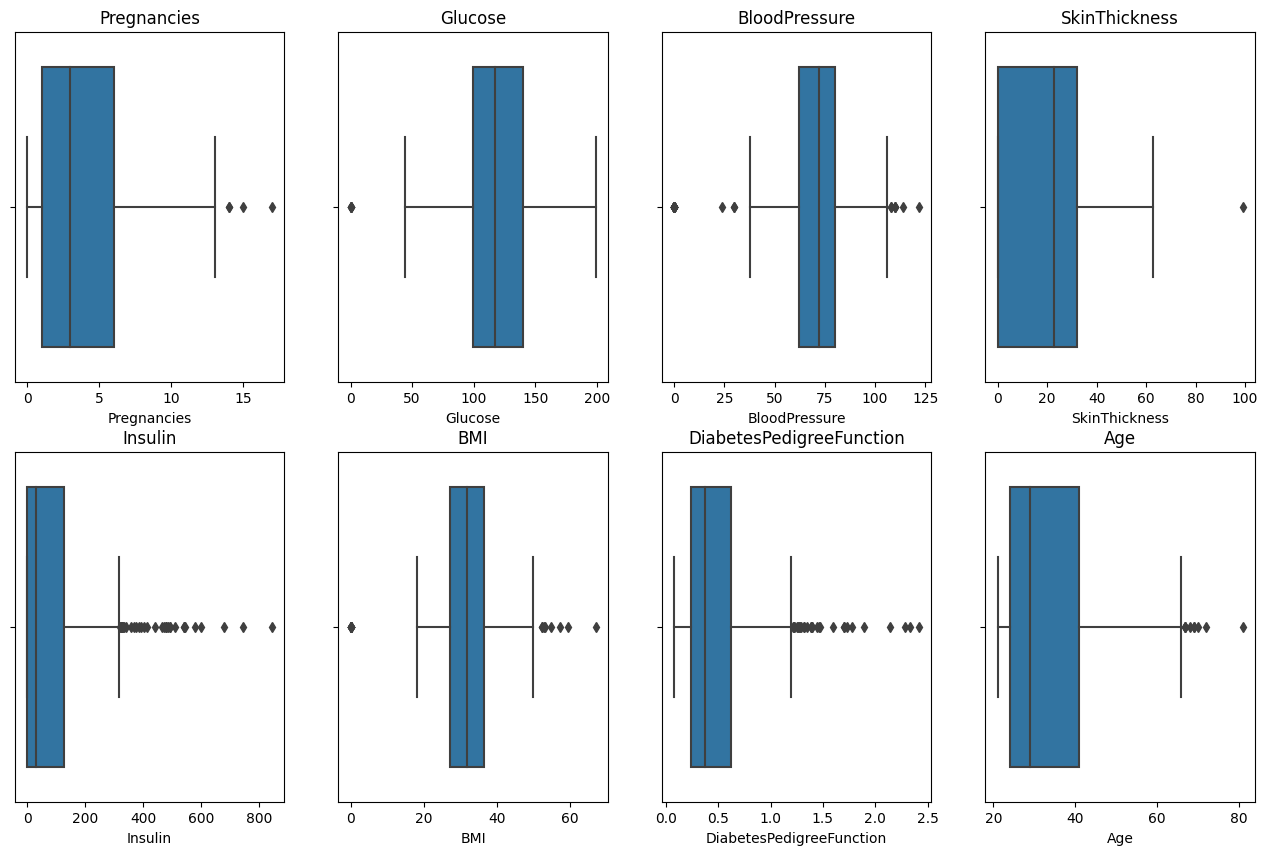

In [63]:
# plot outliers using boxplot

diabetes_model.outlier_detection()

In [ ]:
diabetes_model.handle_outliers(diabetes_model.data.columns)

In [ ]:
diabetes_model.data.head()

In [64]:
diabetes_model.data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
diabetes_model.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


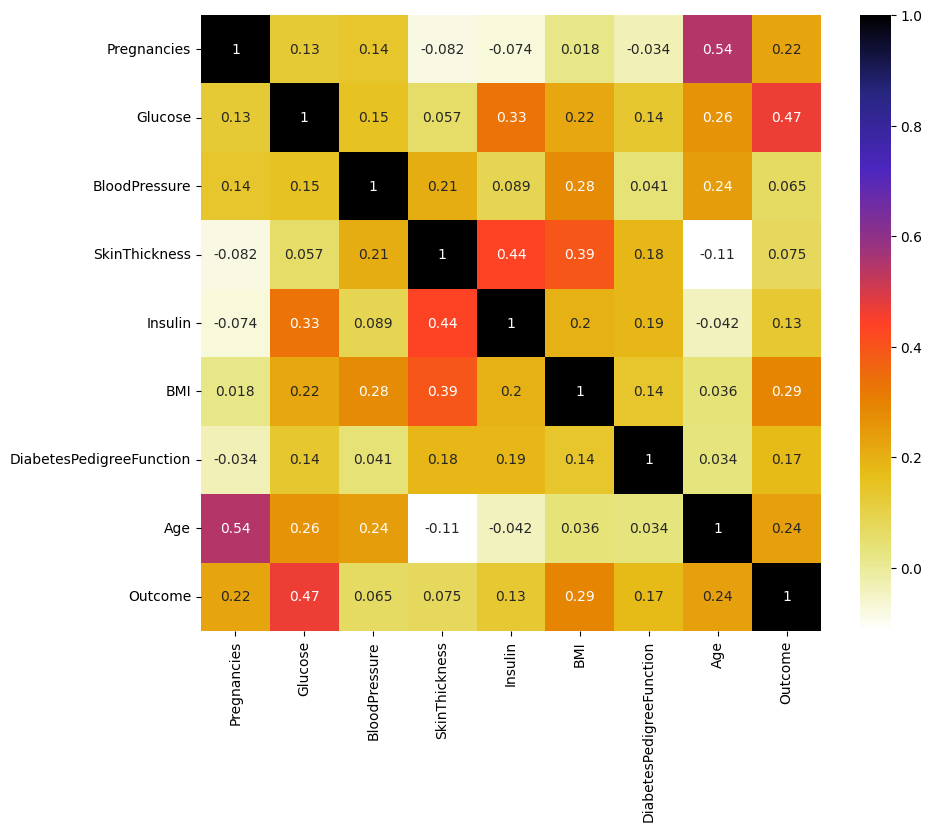

In [66]:
diabetes_model.plot_correlation_matrix()

In [67]:
X_train, X_test, y_train, y_test = diabetes_model.preprocess_data()

In [68]:
diabetes_model.train_models(X_train,y_train)

KNN trained successfully.
SVM trained successfully.
Logistic Regression trained successfully.
Naive Bayes trained successfully.


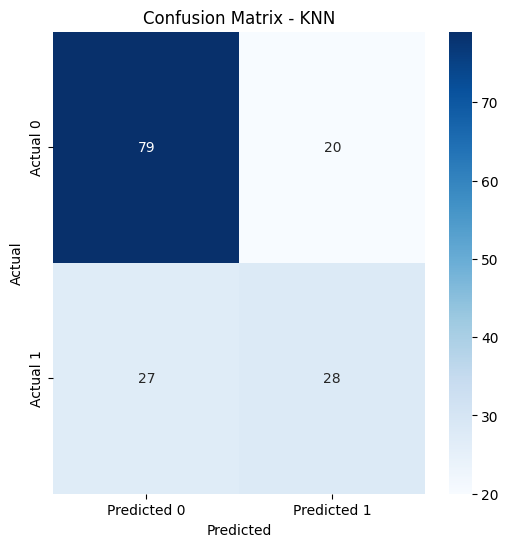


KNN Evaluation:
Accuracy: 0.6948
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



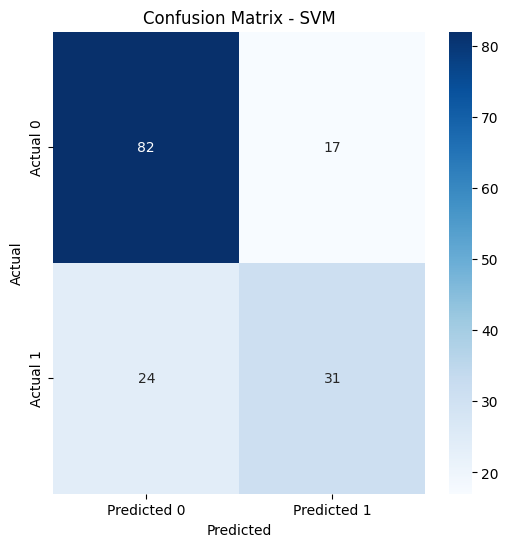


SVM Evaluation:
Accuracy: 0.7338
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



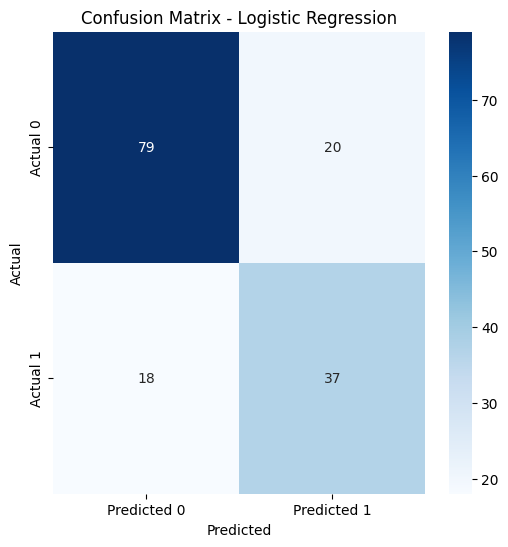


Logistic Regression Evaluation:
Accuracy: 0.7532
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



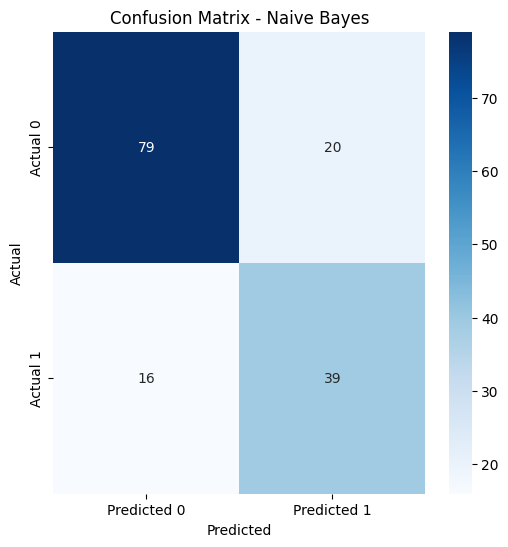


Naive Bayes Evaluation:
Accuracy: 0.7662
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [69]:
diabetes_model.evaluate_models(X_test, y_test)